In [2]:
import pandas as pd
review = pd.read_parquet("review.parquet")
business = pd.read_parquet("business.parquet")
user = pd.read_parquet("user.parquet")

In [3]:
business.head()

,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,attributes,categories,hours
0,Pns2l4eNsfO8kk83dixA6A,"Abby Rappoport, LAC, CMQ","1616 Chapala St, Ste 2",Santa Barbara,CA,93101,34.426679,-119.711197,5.0,7,0,"{'AcceptsInsurance': None, 'AgesAllowed': None...","Doctors, Traditional Chinese Medicine, Naturop...",None
1,mpf3x-BjTdTEA3yCZrAYPw,The UPS Store,87 Grasso Plaza Shopping Center,Affton,MO,63123,38.551126,-90.335695,3.0,15,1,"{'AcceptsInsurance': None, 'AgesAllowed': None...","Shipping Centers, Local Services, Notaries, Ma...","{'Friday': '8:0-18:30', 'Monday': '0:0-0:0', '..."
2,tUFrWirKiKi_TAnsVWINQQ,Target,5255 E Broadway Blvd,Tucson,AZ,85711,32.223236,-110.880452,3.5,22,0,"{'AcceptsInsurance': None, 'AgesAllowed': None...","Department Stores, Shopping, Fashion, Home & G...","{'Friday': '8:0-23:0', 'Monday': '8:0-22:0', '..."
3,MTSW4McQd7CbVtyjqoe9mw,St Honore Pastries,935 Race St,Philadelphia,PA,19107,39.955505,-75.155564,4.0,80,1,"{'AcceptsInsurance': None, 'AgesAllowed': None...","Restaurants, Food, Bubble Tea, Coffee & Tea, B...","{'Friday': '7:0-21:0', 'Monday': '7:0-20:0', '..."
4,mWMc6_wTdE0EUBKIGXDVfA,Perkiomen Valley Brewery,101 Walnut St,Green Lane,PA,18054,40.338183,-75.471659,4.5,13,1,"{'AcceptsInsurance': None, 'AgesAllowed': None...","Brewpubs, Breweries, Food","{'Friday': '12:0-22:0', 'Monday': None, 'Satur..."


In [4]:
business.hours.isna().sum()

23223

In [6]:
business.shape

(150346, 14)

In [4]:
business_clean = pd.read_csv("clean_business.csv")
business_clean.head()

,Unnamed: 0,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,attributes,categories,hours
0,0,Pns2l4eNsfO8kk83dixA6A,"Abby Rappoport, LAC, CMQ","1616 Chapala St, Ste 2",Santa Barbara,CA,93101,34.426679,-119.711197,5.0,7,0,"{'AcceptsInsurance': None, 'AgesAllowed': None...","Doctors, Traditional Chinese Medicine, Naturop...",Unknown
1,1,mpf3x-BjTdTEA3yCZrAYPw,The UPS Store,87 Grasso Plaza Shopping Center,Affton,MO,63123,38.551126,-90.335695,3.0,15,1,"{'AcceptsInsurance': None, 'AgesAllowed': None...","Shipping Centers, Local Services, Notaries, Ma...","{'Friday': '8:0-18:30', 'Monday': '0:0-0:0', '..."
2,2,tUFrWirKiKi_TAnsVWINQQ,Target,5255 E Broadway Blvd,Tucson,AZ,85711,32.223236,-110.880452,3.5,22,0,"{'AcceptsInsurance': None, 'AgesAllowed': None...","Department Stores, Shopping, Fashion, Home & G...","{'Friday': '8:0-23:0', 'Monday': '8:0-22:0', '..."
3,3,MTSW4McQd7CbVtyjqoe9mw,St Honore Pastries,935 Race St,Philadelphia,PA,19107,39.955505,-75.155564,4.0,80,1,"{'AcceptsInsurance': None, 'AgesAllowed': None...","Restaurants, Food, Bubble Tea, Coffee & Tea, B...","{'Friday': '7:0-21:0', 'Monday': '7:0-20:0', '..."
4,4,mWMc6_wTdE0EUBKIGXDVfA,Perkiomen Valley Brewery,101 Walnut St,Green Lane,PA,18054,40.338183,-75.471659,4.5,13,1,"{'AcceptsInsurance': None, 'AgesAllowed': None...","Brewpubs, Breweries, Food","{'Friday': '12:0-22:0', 'Monday': None, 'Satur..."


In [6]:
business_clean.hours.isna().sum()

0

In [7]:
business_clean.shape

(150243, 15)

In [30]:
import pandas as pd
import ast

def calculate_total_hours(hours_str):
    try:
        hours_dict = ast.literal_eval(hours_str)
        total_hours = 0
        for day, time_range in hours_dict.items():
            if time_range is None:
                continue
            
            open_time, close_time = time_range.split('-')
            open_hour, open_minute = map(int, open_time.split(':'))
            close_hour, close_minute = map(int, close_time.split(':'))
            
            open_total = open_hour + open_minute / 60
            close_total = close_hour + close_minute / 60
            if close_total < open_total:
                close_total += 24
            
            duration = close_total - open_total
            total_hours += duration
        return total_hours
    except Exception as e:
        return None

data = {'Unnamed: 0': [0, 1, 2, 3], 'business_id': ['id1', 'id2', 'id3', 'id4'], 'hours': [
    '{"Monday": "10:00-21:00", "Tuesday": "10:00-21:00", "Friday": "10:00-21:00", "Wednesday": "10:00-21:00", "Thursday": "10:00-21:00", "Sunday": "11:00-18:00", "Saturday": "10:00-21:00"}',
    '{"Monday": "10:00-18:00", "Wednesday": "12:00-20:00", "Friday": "14:00-22:00"}',  # Example with missing days
    '{"Friday": "12:0-22:0", "Monday": null, "Saturday": "12:0-22:0", "Sunday": "12:0-18:0", "Thursday": "16:0-22:0", "Tuesday": null, "Wednesday": "14:0-22:0"}',  # Example with None values
    '{"Friday": "12:0-2:0", "Monday": "16:0-0:0", "Saturday": "11:0-2:0", "Sunday": "11:0-0:0", "Thursday": "12:0-0:0", "Tuesday": "16:0-0:0", "Wednesday": "16:0-0:0"}',  # Example with closing past midnight
]}
df = pd.DataFrame(data)

if 'Unnamed: 0' in df.columns:
    df = df.drop(columns=['Unnamed: 0'])

df['total_hours'] = df['hours'].apply(calculate_total_hours)

print(df)


  business_id hours                                                                                                                                                                                     total_hours
0  id1         {"Monday": "10:00-21:00", "Tuesday": "10:00-21:00", "Friday": "10:00-21:00", "Wednesday": "10:00-21:00", "Thursday": "10:00-21:00", "Sunday": "11:00-18:00", "Saturday": "10:00-21:00"}  73.0       
1  id2                                                                                                                  {"Monday": "10:00-18:00", "Wednesday": "12:00-20:00", "Friday": "14:00-22:00"}  24.0       
2  id3                                     {"Friday": "12:0-22:0", "Monday": null, "Saturday": "12:0-22:0", "Sunday": "12:0-18:0", "Thursday": "16:0-22:0", "Tuesday": null, "Wednesday": "14:0-22:0"}   NaN       
3  id4                              {"Friday": "12:0-2:0", "Monday": "16:0-0:0", "Saturday": "11:0-2:0", "Sunday": "11:0-0:0", "Thursday": "12:0-0:0", "

In [32]:
business_clean['total_hours'] = business_clean['hours'].apply(calculate_total_hours)

business_clean.total_hours.describe()

count    127123.000
mean         56.834
std          26.666
min           0.000
25%          41.000
50%          56.000
75%          73.000
max         167.883
Name: total_hours, dtype: float64

In [14]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', 999)
pd.set_option('display.colheader_justify', 'left')
pd.set_option('display.precision', 3)
business_clean.head()

,Unnamed: 0,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,attributes,categories,hours,total_hours
0,0,Pns2l4eNsfO8kk83dixA6A,"Abby Rappoport, LAC, CMQ","1616 Chapala St, Ste 2",Santa Barbara,CA,93101,34.427,-119.711,5.0,7,0,"{'AcceptsInsurance': None, 'AgesAllowed': None...","Doctors, Traditional Chinese Medicine, Naturop...",Unknown,NaN
1,1,mpf3x-BjTdTEA3yCZrAYPw,The UPS Store,87 Grasso Plaza Shopping Center,Affton,MO,63123,38.551,-90.336,3.0,15,1,"{'AcceptsInsurance': None, 'AgesAllowed': None...","Shipping Centers, Local Services, Notaries, Ma...","{'Friday': '8:0-18:30', 'Monday': '0:0-0:0', '...",NaN
2,2,tUFrWirKiKi_TAnsVWINQQ,Target,5255 E Broadway Blvd,Tucson,AZ,85711,32.223,-110.880,3.5,22,0,"{'AcceptsInsurance': None, 'AgesAllowed': None...","Department Stores, Shopping, Fashion, Home & G...","{'Friday': '8:0-23:0', 'Monday': '8:0-22:0', '...",100.0
3,3,MTSW4McQd7CbVtyjqoe9mw,St Honore Pastries,935 Race St,Philadelphia,PA,19107,39.956,-75.156,4.0,80,1,"{'AcceptsInsurance': None, 'AgesAllowed': None...","Restaurants, Food, Bubble Tea, Coffee & Tea, B...","{'Friday': '7:0-21:0', 'Monday': '7:0-20:0', '...",94.0
4,4,mWMc6_wTdE0EUBKIGXDVfA,Perkiomen Valley Brewery,101 Walnut St,Green Lane,PA,18054,40.338,-75.472,4.5,13,1,"{'AcceptsInsurance': None, 'AgesAllowed': None...","Brewpubs, Breweries, Food","{'Friday': '12:0-22:0', 'Monday': None, 'Satur...",NaN


In [33]:
business_clean.total_hours.isna().sum()

23120

In [34]:
business_clean.total_hours.describe()

count    127123.000
mean         56.834
std          26.666
min           0.000
25%          41.000
50%          56.000
75%          73.000
max         167.883
Name: total_hours, dtype: float64

In [17]:
pd.set_option('display.max_colwidth', None)

print(business_clean[business_clean["business_id"] == "mWMc6_wTdE0EUBKIGXDVfA"].hours)

4    {'Friday': '12:0-22:0', 'Monday': None, 'Saturday': '12:0-22:0', 'Sunday': '12:0-18:0', 'Thursday': '16:0-22:0', 'Tuesday': None, 'Wednesday': '14:0-22:0'}
Name: hours, dtype: object


In [35]:
b = business_clean.drop(business_clean.columns[0], axis=1)

In [59]:
b.head()

,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,attributes,categories,hours,total_hours
0,Pns2l4eNsfO8kk83dixA6A,"Abby Rappoport, LAC, CMQ","1616 Chapala St, Ste 2",Santa Barbara,CA,93101,34.427,-119.711,5.0,7,0,"{'AcceptsInsurance': None, 'AgesAllowed': None, 'Alcohol': None, 'Ambience': None, 'BYOB': None, 'BYOBCorkage': None, 'BestNights': None, 'BikeParking': None, 'BusinessAcceptsBitcoin': None, 'BusinessAcceptsCreditCards': None, 'BusinessParking': None, 'ByAppointmentOnly': 'True', 'Caters': None, 'CoatCheck': None, 'Corkage': None, 'DietaryRestrictions': None, 'DogsAllowed': None, 'DriveThru': None, 'GoodForDancing': None, 'GoodForKids': None, 'GoodForMeal': None, 'HairSpecializesIn': None, 'HappyHour': None, 'HasTV': None, 'Music': None, 'NoiseLevel': None, 'Open24Hours': None, 'OutdoorSeating': None, 'RestaurantsAttire': None, 'RestaurantsCounterService': None, 'RestaurantsDelivery': None, 'RestaurantsGoodForGroups': None, 'RestaurantsPriceRange2': None, 'RestaurantsReservations': None, 'RestaurantsTableService': None, 'RestaurantsTakeOut': None, 'Smoking': None, 'WheelchairAccessible': None, 'WiFi': None}","Doctors, Traditional Chinese Medicine, Naturopathic/Holistic, Acupuncture, Health & Medical, Nutritionists",Unknown,NaN
1,mpf3x-BjTdTEA3yCZrAYPw,The UPS Store,87 Grasso Plaza Shopping Center,Affton,MO,63123,38.551,-90.336,3.0,15,1,"{'AcceptsInsurance': None, 'AgesAllowed': None, 'Alcohol': None, 'Ambience': None, 'BYOB': None, 'BYOBCorkage': None, 'BestNights': None, 'BikeParking': None, 'BusinessAcceptsBitcoin': None, 'BusinessAcceptsCreditCards': 'True', 'BusinessParking': None, 'ByAppointmentOnly': None, 'Caters': None, 'CoatCheck': None, 'Corkage': None, 'DietaryRestrictions': None, 'DogsAllowed': None, 'DriveThru': None, 'GoodForDancing': None, 'GoodForKids': None, 'GoodForMeal': None, 'HairSpecializesIn': None, 'HappyHour': None, 'HasTV': None, 'Music': None, 'NoiseLevel': None, 'Open24Hours': None, 'OutdoorSeating': None, 'RestaurantsAttire': None, 'RestaurantsCounterService': None, 'RestaurantsDelivery': None, 'RestaurantsGoodForGroups': None, 'RestaurantsPriceRange2': None, 'RestaurantsReservations': None, 'RestaurantsTableService': None, 'RestaurantsTakeOut': None, 'Smoking': None, 'WheelchairAccessible': None, 'WiFi': None}","Shipping Centers, Local Services, Notaries, Mailbox Centers, Printing Services","{'Friday': '8:0-18:30', 'Monday': '0:0-0:0', 'Saturday': '8:0-14:0', 'Sunday': None, 'Thursday': '8:0-18:30', 'Tuesday': '8:0-18:30', 'Wednesday': '8:0-18:30'}",48.0
2,tUFrWirKiKi_TAnsVWINQQ,Target,5255 E Broadway Blvd,Tucson,AZ,85711,32.223,-110.880,3.5,22,0,"{'AcceptsInsurance': None, 'AgesAllowed': None, 'Alcohol': None, 'Ambience': None, 'BYOB': None, 'BYOBCorkage': None, 'BestNights': None, 'BikeParking': 'True', 'BusinessAcceptsBitcoin': None, 'BusinessAcceptsCreditCards': 'True', 'BusinessParking': ""{'garage': False, 'street': False, 'validated': False, 'lot': True, 'valet': False}"", 'ByAppointmentOnly': 'False', 'Caters': 'False', 'CoatCheck': 'False', 'Corkage': None, 'DietaryRestrictions': None, 'DogsAllowed': 'False', 'DriveThru': None, 'GoodForDancing': None, 'GoodForKids': None, 'GoodForMeal': None, 'HairSpecializesIn': None, 'HappyHour': 'False', 'HasTV': 'False', 'Music': None, 'NoiseLevel': None, 'Open24Hours': None, 'OutdoorSeating': 'False', 'RestaurantsAttire': None, 'RestaurantsCounterService': None, 'RestaurantsDelivery': 'False', 'RestaurantsGoodForGroups': None, 'RestaurantsPriceRange2': '2', 'RestaurantsReservations': 'False', 'RestaurantsTableService': None, 'RestaurantsTakeOut': 'False', 'Smoking': None, 'WheelchairAccessible': 'True', 'WiFi': ""u'no'""}","Department Stores, Shopping, Fashion, Home & Garden, Electronics, Furniture Stores","{'Friday': '8:0-23:0', 'Monday': '8:0-22:0', 'Saturday': '8:0-23:0', 'Sunday': '8:0-22:0', 'Thursday': '8:0-22:0', 'Tuesday': '8:0-22:0', 'Wednesday': '8:0-22:0'}",100.0
3,MTSW4McQd7CbVtyjqoe

In [29]:
negative_hours_df = b[b['total_hours'] < 0]
negative_hours_df.head()

,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,attributes,categories,hours,total_hours
28,QdN72BWoyFypdGJhhI5r7g,Bar One,767 S 9th St,Philadelphia,PA,19147,39.940,-75.157,4.0,65,0,"{'AcceptsInsurance': None, 'AgesAllowed': None, 'Alcohol': ""u'full_bar'"", 'Ambience': ""{'touristy': False, 'hipster': True, 'romantic': None, 'divey': False, 'intimate': False, 'trendy': None, 'upscale': False, 'classy': None, 'casual': True}"", 'BYOB': None, 'BYOBCorkage': None, 'BestNights': None, 'BikeParking': 'True', 'BusinessAcceptsBitcoin': None, 'BusinessAcceptsCreditCards': 'True', 'BusinessParking': ""{'garage': None, 'street': True, 'validated': None, 'lot': False, 'valet': False}"", 'ByAppointmentOnly': None, 'Caters': 'False', 'CoatCheck': None, 'Corkage': None, 'DietaryRestrictions': None, 'DogsAllowed': None, 'DriveThru': None, 'GoodForDancing': 'False', 'GoodForKids': 'False', 'GoodForMeal': ""{'dessert': False, 'latenight': False, 'lunch': False, 'dinner': False, 'brunch': True, 'breakfast': False}"", 'HairSpecializesIn': None, 'HappyHour': 'True', 'HasTV': 'True', 'Music': ""{'dj': False, 'background_music': False, 'no_music': False, 'jukebox': False, 'live': False, 'video': False, 'karaoke': False}"", 'NoiseLevel': ""u'average'"", 'Open24Hours': None, 'OutdoorSeating': 'False', 'RestaurantsAttire': ""'casual'"", 'RestaurantsCounterService': None, 'RestaurantsDelivery': 'True', 'RestaurantsGoodForGroups': 'True', 'RestaurantsPriceRange2': '2', 'RestaurantsReservations': 'False', 'RestaurantsTableService': 'True', 'RestaurantsTakeOut': 'True', 'Smoking': ""u'no'"", 'WheelchairAccessible': None, 'WiFi': ""u'free'""}","Cocktail Bars, Bars, Italian, Nightlife, Restaurants","{'Friday': '12:0-2:0', 'Monday': '16:0-0:0', 'Saturday': '11:0-2:0', 'Sunday': '11:0-0:0', 'Thursday': '12:0-0:0', 'Tuesday': '16:0-0:0', 'Wednesday': '16:0-0:0'}",-90.0
29,sqSqqLy0sN8n2IZrAbzidQ,Domino's Pizza,3001 Highway 31 W,White House,TN,37188,36.465,-86.659,3.5,8,1,"{'AcceptsInsurance': None, 'AgesAllowed': None, 'Alcohol': None, 'Ambience': None, 'BYOB': None, 'BYOBCorkage': None, 'BestNights': None, 'BikeParking': None, 'BusinessAcceptsBitcoin': None, 'BusinessAcceptsCreditCards': None, 'BusinessParking': None, 'ByAppointmentOnly': None, 'Caters': None, 'CoatCheck': None, 'Corkage': None, 'DietaryRestrictions': None, 'DogsAllowed': None, 'DriveThru': None, 'GoodForDancing': None, 'GoodForKids': None, 'GoodForMeal': None, 'HairSpecializesIn': None, 'HappyHour': None, 'HasTV': None, 'Music': None, 'NoiseLevel': None, 'Open24Hours': None, 'OutdoorSeating': None, 'RestaurantsAttire': None, 'RestaurantsCounterService': None, 'RestaurantsDelivery': None, 'RestaurantsGoodForGroups': None, 'RestaurantsPriceRange2': '1', 'RestaurantsReservations': None, 'RestaurantsTableService': None, 'RestaurantsTakeOut': None, 'Smoking': None, 'WheelchairAccessible': None, 'WiFi': None}","Pizza, Chicken Wings, Sandwiches, Restaurants","{'Friday': '10:0-1:0', 'Monday': '10:0-0:0', 'Saturday': '10:0-1:0', 'Sunday': '10:0-0:0', 'Thursday': '10:0-0:0', 'Tuesday': '10:0-0:0', 'Wednesday': '10:0-0:0'}",-68.0
31,Mjboz24M9NlBeiOJKLEd_Q,DeSandro on Main,4105 Main St,Philadelphia,PA,19127,40.022,-75.218,3.0,41,0,"{'AcceptsInsurance': None, 'AgesAllowed': None, 'Alcohol': ""u'none'"", 'Ambience': ""{'romantic': False, 'intimate': False, 'classy': False, 'hipster': False, 'divey': False, 'touristy': False, 'trendy': False, 'upscale': False, 'casual': False}"", 'BYOB': None, 'BYOBCorkage': None, 'BestNights': None, 'BikeParking': 'True', 'BusinessAcceptsBitcoin': None, 'BusinessAcceptsCreditCards': 'True', 'BusinessParking': ""{'garage': False, 'street': False, 'validated': False, 'lot': False, 'valet': False}"", 'ByAppointmentOnly': None, 'Caters': 'False', 'CoatCheck': None, 'Corkage': None, 'DietaryRestrictions': None, 'DogsAllowed': None, 'DriveThru': None, 'GoodForDancing': None, 'GoodForKids': 'True', 'GoodForMeal': ""{'dessert': False,

In [37]:
b.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150243 entries, 0 to 150242
Data columns (total 15 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   business_id   150243 non-null  object 
 1   name          150243 non-null  object 
 2   address       145117 non-null  object 
 3   city          150243 non-null  object 
 4   state         150243 non-null  object 
 5   postal_code   150170 non-null  object 
 6   latitude      150243 non-null  float64
 7   longitude     150243 non-null  float64
 8   stars         150243 non-null  float64
 9   review_count  150243 non-null  int64  
 10  is_open       150243 non-null  int64  
 11  attributes    150243 non-null  object 
 12  categories    150243 non-null  object 
 13  hours         150243 non-null  object 
 14  total_hours   127123 non-null  float64
dtypes: float64(4), int64(2), object(9)
memory usage: 17.2+ MB


In [38]:
b.to_csv("clean_business.csv")

In [41]:
b_cluster = b[["latitude","longitude","stars","review_count","total_hours"]]         

In [42]:
b_cluster.head()

,latitude,longitude,stars,review_count,total_hours
0,34.427,-119.711,5.0,7,NaN
1,38.551,-90.336,3.0,15,48.0
2,32.223,-110.880,3.5,22,100.0
3,39.956,-75.156,4.0,80,94.0
4,40.338,-75.472,4.5,13,40.0


In [44]:
!pip install geopy

In [47]:
!pip install folium

In [51]:
!pip install basemap basemap-data

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 936.0/936.0 kB 23.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 30.5/30.5 MB 120.0 MB/s eta 0:00:0000:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.3/8.3 MB 155.8 MB/s eta 0:00:00
  Attempting uninstall: pyproj
    Found existing installation: pyproj 3.7.0
    Uninstalling pyproj-3.7.0:
      Successfully uninstalled pyproj-3.7.0
  You can safely remove it manually.
  Attempting uninstall: packaging
    Found existing installation: packaging 24.2
    Uninstalling packaging-24.2:
      Successfully uninstalled packaging-24.2


In [57]:
!pip install hdbscan

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.2/4.2 MB 62.6 MB/s eta 0:00:00


/var/tmp/ipykernel_225411/4211018809.py:36: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colors = plt.cm.get_cmap("tab10", len(unique_clusters))
/var/tmp/ipykernel_225411/4211018809.py:46: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  m.scatter(x[cluster_mask], y[cluster_mask], s=80, c=color, label=label, alpha=0.7)


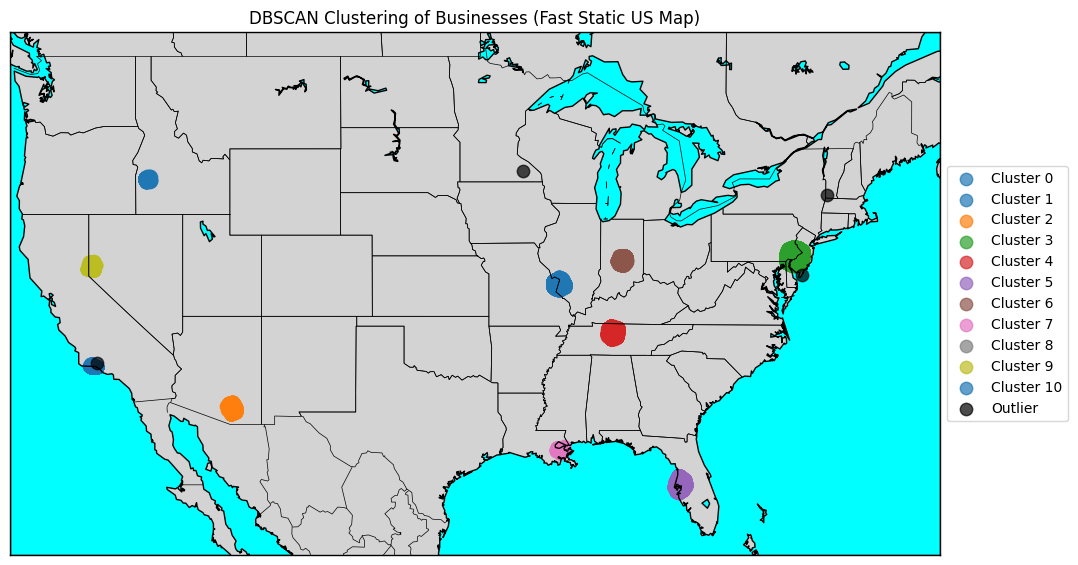

In [65]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN
from mpl_toolkits.basemap import Basemap

# Load business data (assuming b_cluster exists)
df = b_cluster.copy()

# Extract latitude and longitude
coords = df[['latitude', 'longitude']].to_numpy()

# Convert degrees to radians (required for Haversine distance)
coords_radians = np.radians(coords)

# Apply DBSCAN clustering
db = DBSCAN(eps=10/6371, min_samples=5, metric='haversine').fit(coords_radians)
df['cluster'] = db.labels_

# Initialize Basemap for the US
plt.figure(figsize=(12, 8))
m = Basemap(projection='merc', llcrnrlat=24, urcrnrlat=50, llcrnrlon=-125, urcrnrlon=-66, resolution='l')

# Draw map details
m.drawcoastlines()
m.drawcountries()
m.drawstates()
m.fillcontinents(color='lightgray', lake_color='aqua')
m.drawmapboundary(fill_color='aqua')

# Convert lat/lon to map coordinates
x, y = m(df['longitude'].values, df['latitude'].values)

# Assign colors to clusters
unique_clusters = df['cluster'].unique()
colors = plt.cm.get_cmap("tab10", len(unique_clusters))

# Increase cluster marker size
for cluster_label in unique_clusters:
    cluster_mask = df['cluster'] == cluster_label
    if cluster_label == -1:
        color = 'black'  # Assign black to outliers
    else:
        color = colors(cluster_label % 10)  # Assign different colors to clusters
    label = 'Outlier' if cluster_label == -1 else f'Cluster {cluster_label}'
    m.scatter(x[cluster_mask], y[cluster_mask], s=80, c=color, label=label, alpha=0.7)

# Set the legend outside the plot
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.title("DBSCAN Clustering of Businesses (Fast Static US Map)")
plt.show()
